In [1]:
!pip install kaggle
!pip install pandas
!pip install seaborn

In [2]:
!kaggle datasets download -d wenruliu/adult-income-dataset

    

adult-income-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


In [3]:
!unzip -o adult-income-dataset.zip

'unzip' is not recognized as an internal or external command,
operable program or batch file.


In [12]:
import pandas as pd
df=pd.read_csv('adult-income-dataset.csv')
df


age     workclass  fnlwgt     education  educational-num  \
0       25       Private  226802          11th                7   
1       38       Private   89814       HS-grad                9   
2       28     Local-gov  336951    Assoc-acdm               12   
3       44       Private  160323  Some-college               10   
4       18             ?  103497  Some-college               10   
...    ...           ...     ...           ...              ...   
48837   27       Private  257302    Assoc-acdm               12   
48838   40       Private  154374       HS-grad                9   
48839   58       Private  151910       HS-grad                9   
48840   22       Private  201490       HS-grad                9   
48841   52  Self-emp-inc  287927       HS-grad                9   

           marital-status         occupation relationship   race  gender  \
0           Never-married  Machine-op-inspct    Own-child  Black    Male   
1      Married-civ-spouse    Farming-fishing      Husband  White    Male   
2      Married-civ-spouse    Protective-serv      Husband  White    Male   
3      Married-civ-spouse  Machine-op-inspct      Husband  Black    Male   
4           Never-married                  ?    Own-child  White  Female   
...                   ...                ...          ...    ...     ...   
48837  Married-civ-spouse       Tech-support         Wife  White  Female   
48838  Married-civ-spouse  Machine-op-inspct      Husband  White    Male   
48839             Widowed       Adm-clerical    Unmarried  White  Female   
48840       Never-married       Adm-clerical    Own-child  White    Male   
48841  Married-civ-spouse    Exec-managerial         Wife  White  Female   

       capital-gain  capital-loss  hours-per-week native-country income  
0                 0             0              40  United-States  <=50K  
1                 0             0              50  United-States  <=50K  
2                 0             0              40  United-States   >50K  
3              7688             0              40  United-States   >50K  
4                 0             0              30  United-States  <=50K  
...             ...           ...             ...            ...    ...  
48837             0             0              38  United-States  <=50K  
48838             0             0              40  United-States   >50K  
48839             0             0              40  United-States  <=50K  
48840             0             0              20  United-States  <=50K  
48841         15024             0              40  United-States   >50K  

[48842 rows x 15 columns]

In [23]:
#usunięcie nie pełnych danych 
df = df[df.workclass != '?']

In [5]:
import torch

train_size = int(0.8 * len(df))
test_size = (len(df) - train_size)
df_train, df_test = torch.utils.data.random_split(df, [train_size, test_size])

In [6]:
print(f"Wielkosc zbioru: {len(df)}, podzbiór train: {train_size}, podzbiór test {test_size}.")
df.describe(include='all')


Wielkosc zbioru: 48842, podzbiór train: 39073, podzbiór test 9769.


age workclass        fnlwgt education  educational-num  \
count   48842.000000     48842  4.884200e+04     48842     48842.000000   
unique           NaN         9           NaN        16              NaN   
top              NaN   Private           NaN   HS-grad              NaN   
freq             NaN     33906           NaN     15784              NaN   
mean       38.643585       NaN  1.896641e+05       NaN        10.078089   
std        13.710510       NaN  1.056040e+05       NaN         2.570973   
min        17.000000       NaN  1.228500e+04       NaN         1.000000   
25%        28.000000       NaN  1.175505e+05       NaN         9.000000   
50%        37.000000       NaN  1.781445e+05       NaN        10.000000   
75%        48.000000       NaN  2.376420e+05       NaN        12.000000   
max        90.000000       NaN  1.490400e+06       NaN        16.000000   

            marital-status      occupation relationship   race gender  \
count                48842           48842        48842  48842  48842   
unique                   7              15            6      5      2   
top     Married-civ-spouse  Prof-specialty      Husband  White   Male   
freq                 22379            6172        19716  41762  32650   
mean                   NaN             NaN          NaN    NaN    NaN   
std                    NaN             NaN          NaN    NaN    NaN   
min                    NaN             NaN          NaN    NaN    NaN   
25%                    NaN             NaN          NaN    NaN    NaN   
50%                    NaN             NaN          NaN    NaN    NaN   
75%                    NaN             NaN          NaN    NaN    NaN   
max                    NaN             NaN          NaN    NaN    NaN   

        capital-gain  capital-loss  hours-per-week native-country income  
count   48842.000000  48842.000000    48842.000000          48842  48842  
unique           NaN           NaN             NaN             42      2  
top              NaN           NaN             NaN  United-States  <=50K  
freq             NaN           NaN             NaN          43832  37155  
mean     1079.067626     87.502314       40.422382            NaN    NaN  
std      7452.019058    403.004552       12.391444            NaN    NaN  
min         0.000000      0.000000        1.000000            NaN    NaN  
25%         0.000000      0.000000       40.000000            NaN    NaN  
50%         0.000000      0.000000       40.000000            NaN    NaN  
75%         0.000000      0.000000       45.000000            NaN    NaN  
max     99999.000000   4356.000000       99.000000            NaN    NaN

<AxesSubplot:title={'center':'income'}>

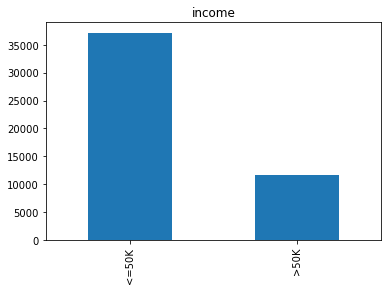

In [7]:
df["income"].value_counts().plot(kind="bar", title="income")